In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [16]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
# Dropping serial number
data = data.drop('Serial No.',axis=1)

In [11]:
# This shows there is no null values?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


<AxesSubplot:>

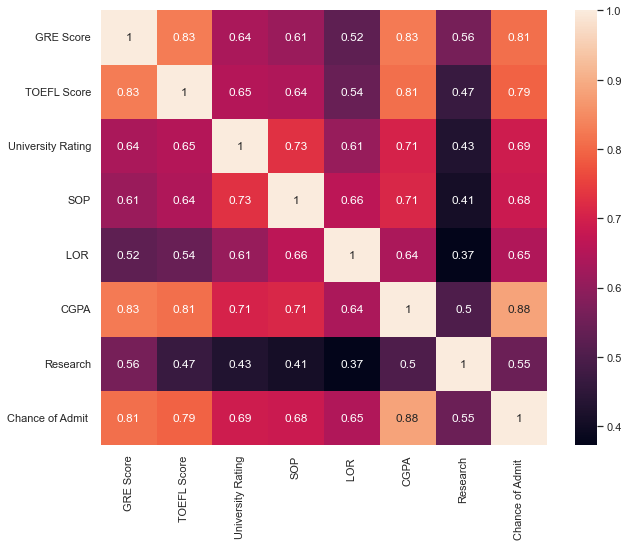

In [12]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(data.corr(),annot=True)

Text(0, 0.5, 'Chance of Admit')

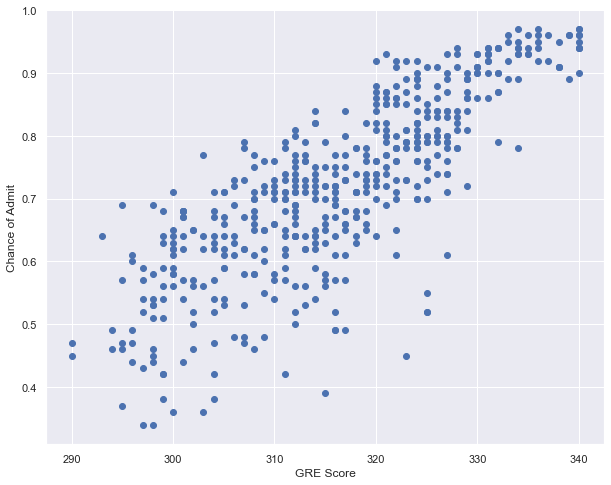

In [17]:
plt.scatter(data['GRE Score'],data['Chance of Admit '])
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")

Text(0, 0.5, 'Chance of Admit')

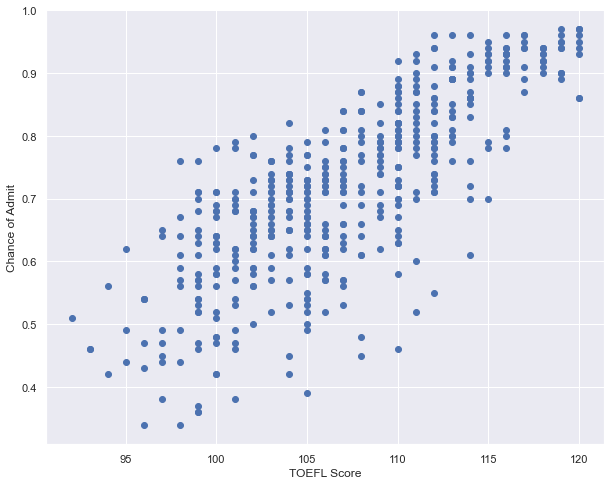

In [18]:
plt.scatter(data['TOEFL Score'],data['Chance of Admit '])
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")

Text(0, 0.5, 'Chance of Admit')

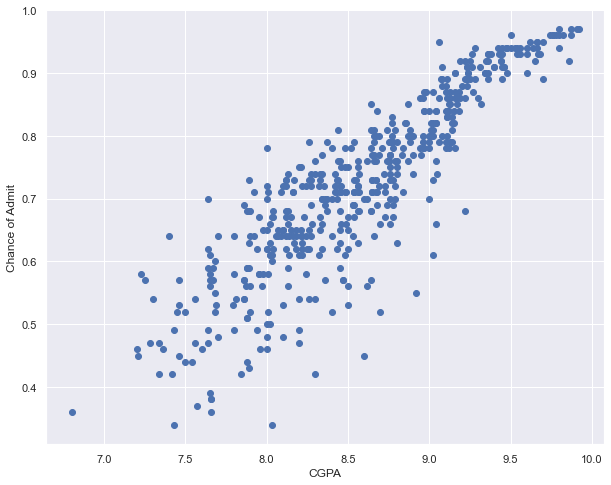

In [22]:
plt.scatter(data['CGPA'],data['Chance of Admit '])
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")

### Performing regression

In [45]:
## Independent And Dependent Features
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [46]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
# perform standardization
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
# Model training
model = SVR(C=1.0, epsilon=0.2)

In [49]:
model.fit(X_train,y_train)

SVR(epsilon=0.2)

In [50]:
pred=model.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

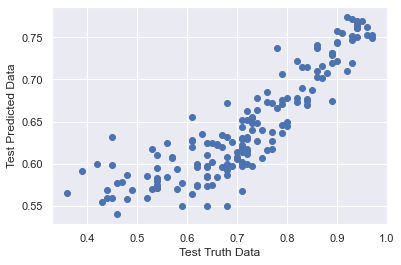

In [51]:
plt.scatter(y_test,pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [52]:
residuals=y_test-pred

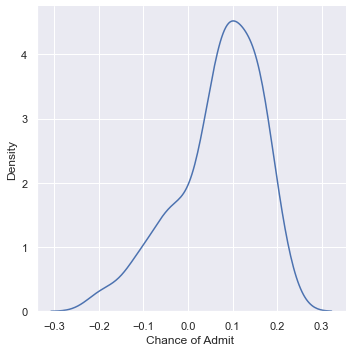

In [53]:
sns.displot(residuals,kind="kde")

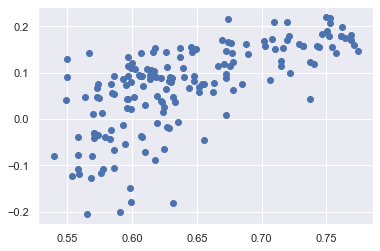

In [54]:
plt.scatter(pred,residuals)

In [57]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.0137106376286639
0.10352307411163121
0.11709243198714381


In [59]:
# performance metrics
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
print(score)

0.3345449404871953


In [60]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3048749696808919